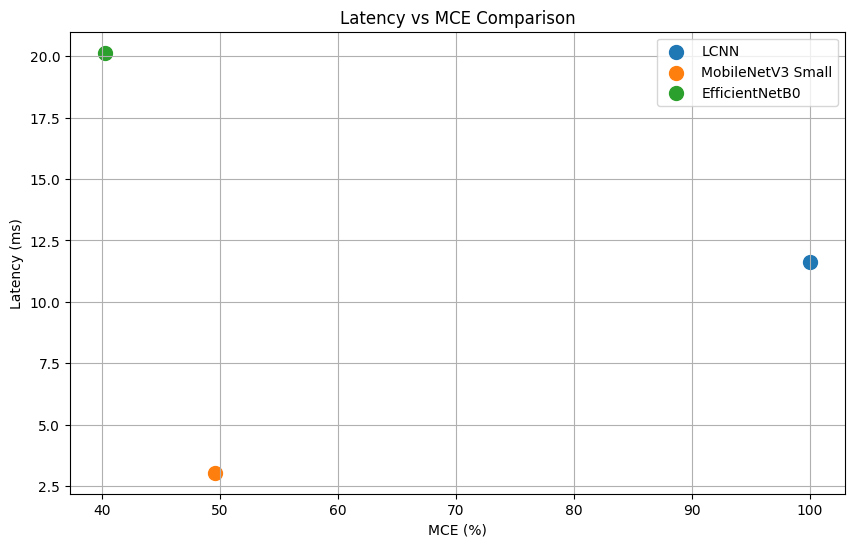

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Read the benchmark results
with open('benchmark_results.json', 'r') as f:
    benchmark_data = json.load(f)

# Read the MCE data from Excel
mce_data = pd.read_excel('results/mce/tabela_mce.xlsx')

# Create a DataFrame for latency data
latency_df = pd.DataFrame(benchmark_data)

# Create the plot
plt.figure(figsize=(10, 6))

# Mapeamento dos nomes dos modelos (nome no Excel -> nome para exibição)
model_mapping = {
    'lcnn': 'LCNN',
    'mobilenetv3': 'MobileNetV3 Small',
    'efficientNetB0': 'EfficientNetB0'
}

# Mapeamento para busca no Excel
excel_mapping = {
    'lcnn': 'LCNN',
    'mobilenetv3': 'MobileNetV3',
    'efficientNetB0': 'EfficientNet'
}

# Plot each model
for model_latency, model_mce in excel_mapping.items():
    # Get latency data
    model_latency_value = latency_df[latency_df['model_name'] == model_latency]['mean_ms'].values[0]
    
    # Get MCE data
    model_mce_value = mce_data[mce_data['Network'] == model_mce]['mCE'].values[0]
    
    # Use o nome de exibição do model_mapping para a legenda
    plt.scatter(model_mce_value, model_latency_value, label=model_mapping[model_latency], s=100)

plt.xlabel('MCE (%)')
plt.ylabel('Latency (ms)')
plt.title('Latency vs MCE Comparison')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('latency_vs_mce.png')
plt.show()
plt.close()